In [16]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy.linalg
import numpy as np

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

### 创建图

In [3]:
n = 1000
m = 5000
G = nx.gnm_random_graph(n, m, seed=5040)

### 邻接矩阵

In [4]:
A = nx.adjacency_matrix(G)

C:\Users\澄某人啊\AppData\Local\Temp\ipykernel_16736\1018844737.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)


In [5]:
A.shape

(1000, 1000)

In [6]:
A.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

### 拉普拉斯矩阵

In [11]:
L = nx.laplacian_matrix(G)
print(L.todense())

[[12  0  0 ...  0  0  0]
 [ 0  6  0 ...  0  0  0]
 [ 0  0  8 ...  0  0  0]
 ...
 [ 0  0  0 ...  8  0  0]
 [ 0  0  0 ...  0  6  0]
 [ 0  0  0 ...  0  0  7]]


<class 'networkx.utils.decorators.argmap'> compilation 8:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


In [10]:
D = L + A
D.todense()

matrix([[12,  0,  0, ...,  0,  0,  0],
        [ 0,  6,  0, ...,  0,  0,  0],
        [ 0,  0,  8, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ...,  8,  0,  0],
        [ 0,  0,  0, ...,  0,  6,  0],
        [ 0,  0,  0, ...,  0,  0,  7]], dtype=int32)

In [12]:
L_n = nx.normalized_laplacian_matrix(G)

<class 'networkx.utils.decorators.argmap'> compilation 12:4: FutureWarning: normalized_laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


In [13]:
L_n.todense()

matrix([[1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 1.]])

#### 特征值分解

In [18]:
e = np.linalg.eigvals(L_n.A) # .A 化为数组

In [19]:
e

array([-5.36911010e-17,  4.02846420e-01,  4.06224295e-01,  4.12963520e-01,
        4.15548851e-01,  4.16517467e-01,  4.20582471e-01,  4.24326947e-01,
        1.59246179e+00,  1.58938840e+00,  1.58583526e+00,  1.58139953e+00,
        1.58070318e+00,  1.57786096e+00,  1.57398179e+00,  1.57237733e+00,
        1.57150969e+00,  1.57095514e+00,  1.56726875e+00,  1.56345866e+00,
        1.56395825e+00,  1.56009824e+00,  1.55880096e+00,  1.55717189e+00,
        1.55698938e+00,  1.55475549e+00,  1.54908738e+00,  1.54681927e+00,
        1.54491505e+00,  1.54352783e+00,  1.54231896e+00,  1.54051439e+00,
        1.54098279e+00,  1.53578067e+00,  1.53502733e+00,  1.53439005e+00,
        1.53141471e+00,  1.53085674e+00,  1.52838134e+00,  1.50786560e+00,
        1.52515680e+00,  1.52512114e+00,  1.51050284e+00,  1.51160361e+00,
        1.51266269e+00,  1.52151217e+00,  1.52011306e+00,  1.52064972e+00,
        1.51650845e+00,  1.51789644e+00,  1.51734481e+00,  4.29110624e-01,
        4.31464217e-01,  

### 特征值分布直方图

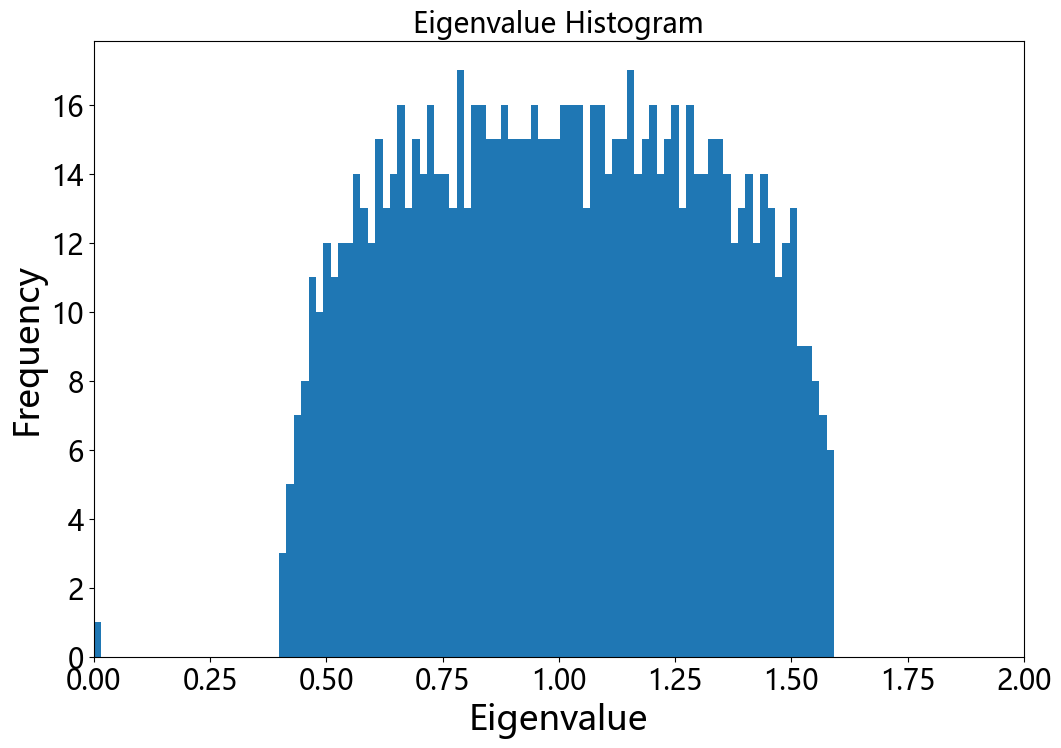

In [21]:
plt.figure(figsize=(12, 8))

plt.hist(e, bins=100)
plt.xlim(0, 2)

plt.title("Eigenvalue Histogram", fontsize=20)
plt.ylabel('Frequency', fontsize=25)
plt.xlabel('Eigenvalue', fontsize=25)
plt.tick_params(labelsize=20)
plt.show()